#01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path_name = r'/Users/geetika/Documents/Python/Instacart Basket Analysis'

In [3]:
# Importing ords_prods_custs_merge dataset
ords_prods_custs_merge = pd.read_pickle(os.path.join(path_name, '02_Data', 'Prepared Data', 'ords_prods_custs_merge.pkl'))

In [4]:
ords_prods_custs_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,surname,gender,state,age,date_joined,number_of_dependents,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


In [5]:
ords_prods_custs_merge.shape

(32434212, 29)

In [6]:
ords_prods_custs_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag',
       'mean_price_of_products', 'spending_flag',
       'median_days_since_prior_order', 'Regularity_of_customer', 'First Name',
       'surname', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income', '_merge'],
      dtype='object')

#02. Histogram of column "order_hour_of_day"

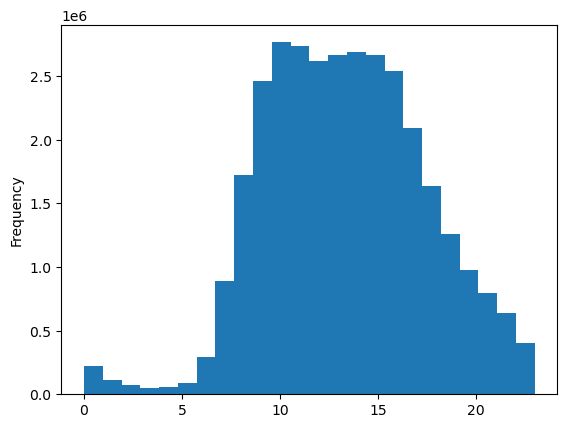

In [30]:
histogram = ords_prods_custs_merge['order_hour_of_day'].plot.hist(bins = 24)

This is a left skewed distribution meaning that the mean is less than the median. The the number of orders increase from 6 AM. The busiest time of the day is from 10 AM to 3 PM and there after there is a steady decline.

#03. Bar chart of "loyalty_flag"

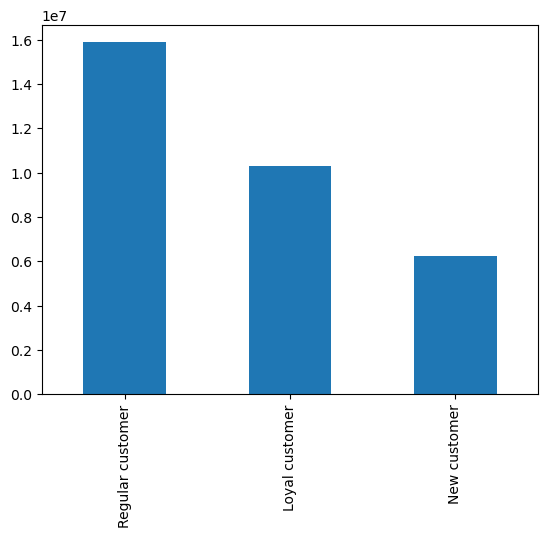

In [31]:
bar = ords_prods_custs_merge['loyalty_flag'].value_counts().plot.bar()

#04. Difference in expenditure

- Creating accurate sample data sets

In [9]:
np.random.seed(4)

In [11]:
dev = np.random.rand(len(ords_prods_custs_merge)) <= 0.7

In [12]:
dev

array([False,  True, False, ..., False,  True,  True])

In [13]:
# Store 70% of the sample in the dataframe big
big = ords_prods_custs_merge[dev]

In [14]:
# Store 30% of the sample in the dataframe small
small = ords_prods_custs_merge[~dev]

In [15]:
len(ords_prods_custs_merge)

32434212

In [16]:
len(big) + len(small)

32434212

In [17]:
big.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_price_of_products,median_days_since_prior_order,age,number_of_dependents,income
count,2.270448e+07,2.270448e+07,2.270448e+07,2.270448e+07,2.270448e+07,2.125008e+07,2.270448e+07,2.270448e+07,2.270448e+07,2.270448e+07,2.270448e+07,2.270448e+07,2.270448e+07,2.270448e+07,2.270448e+07,2.270448e+07,2.270448e+07,2.270448e+07
mean,1.710807e+06,1.029320e+05,1.714195e+01,2.738676e+00,1.342419e+01,1.110279e+01,2.557824e+04,8.351194e+00,5.896969e-01,7.121228e+01,9.922281e+00,1.201898e+01,3.305218e+01,1.197865e+01,1.039811e+01,4.946630e+01,1.502008e+00,9.943985e+04
std,9.874143e+05,5.946850e+04,1.753613e+01,2.090104e+00,4.245955e+00,8.778018e+00,1.409617e+04,7.126231e+00,4.918887e-01,3.820552e+01,6.281513e+00,4.999251e+02,2.515678e+01,8.339070e+01,7.131605e+00,1.848443e+01,1.118812e+00,4.305377e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.557090e+05,5.141400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353500e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.391892e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700800e+04
50%,1.711118e+06,1.025910e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.526300e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.829302e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.662000e+04
75%,2.565680e+06,1.543900e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.793800e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.258611e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279140e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.440000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [18]:
small.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_price_of_products,median_days_since_prior_order,age,number_of_dependents,income
count,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.106048e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06,9.729729e+06
mean,1.710610e+06,1.029499e+05,1.714186e+01,2.739123e+00,1.342688e+01,1.110736e+01,2.557670e+04,8.351135e+00,5.896698e-01,7.122632e+01,9.922114e+00,1.189284e+01,3.305214e+01,1.198697e+01,1.039754e+01,4.946265e+01,1.501555e+00,9.942450e+04
std,9.870320e+05,5.946180e+04,1.753201e+01,2.089915e+00,4.247277e+00,8.781100e+00,1.409605e+04,7.127756e+00,4.918936e-01,3.820142e+01,6.280434e+00,4.847824e+02,2.514914e+01,8.272269e+01,7.130357e+00,1.848810e+01,1.119007e+00,4.305697e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.564450e+05,5.142900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353200e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.392029e+00,6.000000e+00,3.300000e+01,0.000000e+00,6.698800e+04
50%,1.710882e+06,1.026630e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.829594e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.659700e+04
75%,2.565050e+06,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.793300e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.258784e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.278860e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


The ords_prods_custs_merge dataframe has been split into two samples - big and small - with a 70/30 ratio. The describe function has been used to check the descriptive statistics of the sample data frames. As seen above, the 30 percent sample statistically resembles the 70 percent sample.

- Creating line charts

In [19]:
# Line Chart of prices vs. hour of the day
df_line_chart = small[['order_hour_of_day', 'prices']]

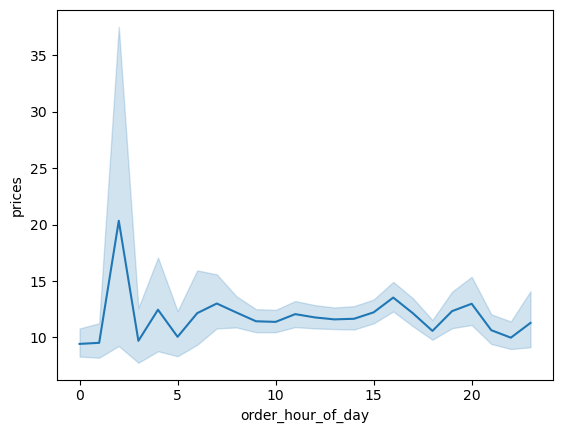

In [20]:
line = sns.lineplot(data = df_line_chart, x = 'order_hour_of_day', y = 'prices')

In [21]:
# Line Chart of number of dependents and age
df_line_chart_2 = small[['number_of_dependents', 'age']]

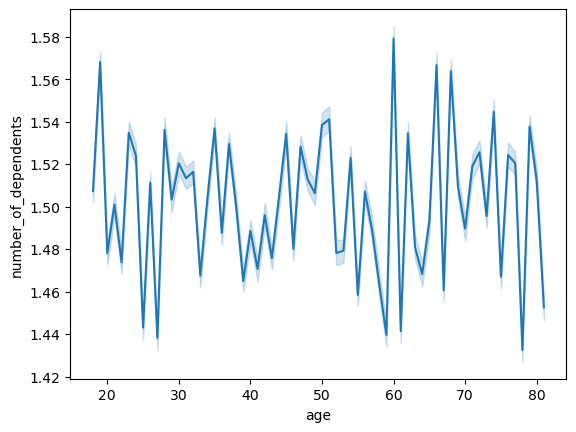

In [23]:
line_2 = sns.lineplot(data = df_line_chart_2, x = 'age', y = 'number_of_dependents')

The line chart of number_of_dependents vs. age is very erratic and there is no clear pattern to be found.

#05. Connection between age and spending power(income)

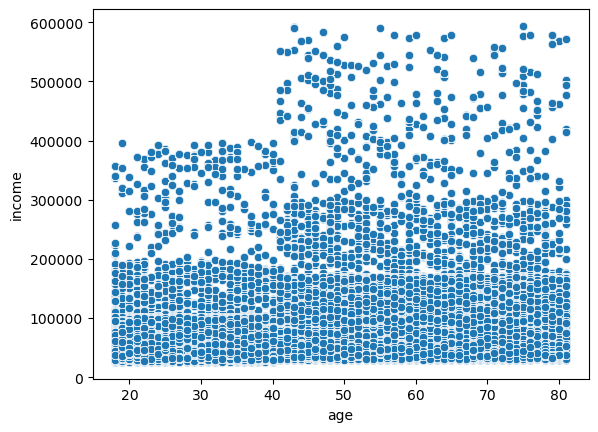

In [36]:
# Generating a scatter plot of income vs. age
scatter_plot = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_custs_merge)

According to the scatter plot, the customers between ages 20 and 40 earn between 26000 and 200000. The maximum income of people in this age group caps at about 400000, but demographic is significatly lower than people earning less than 200000.

Most customers between the 40 to 80 have a income in the range of 26000 to 200000, similar to the customers between ages 20 and 40. There seems to a second group of customers in this age range that earn between 200000 and 300000. And lastly there are also some customers in this age group that earn between 300000 and 600000 although this demographic is also pretty small.

#06. Exporting the visualizations

In [34]:
# Exporting the histogram
histogram.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', '4.9.2_histogram.png'))

In [35]:
# Exporting the bar chart
bar.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', '4.9.2_Bar_chart.png'))

In [38]:
# Exporting the line chart prices vs. hour of the day
line.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', '4.9.2_Line_chart_price_hourofday.png'))

In [39]:
# Exporting the line chart age vs. number of dependents
line_2.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', '4.9.2_Line_chart_age_dependents.png'))

In [42]:
# Exporting the scatter plot
scatter_plot.figure.savefig(os.path.join(path_name, '04_Analysis','Visualizations', '4.9.2_Scatter_plot.png'))